In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("telecom_churn.csv")

#  Exploratory data analysis

In [5]:
data.head(10)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0.00,0,223.4,98,57.0,11.03,6.3
6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
7,0,147,0,0,0.00,0,157.0,79,36.0,5.16,7.1
8,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7
9,0,141,0,1,3.02,0,258.6,84,93.2,11.10,11.2


In [6]:
data.tail(10)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
3323,1,117,1,0,0.39,5,118.4,126,45.9,12.47,13.6
3324,0,159,1,0,0.00,1,169.8,114,46.0,9.89,11.6
3325,0,78,1,0,0.23,2,193.4,99,45.3,5.85,9.3
3326,0,96,1,0,0.36,1,106.6,128,46.6,14.24,14.9
3327,0,79,1,0,0.00,2,134.7,98,40.0,9.49,11.8
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0
3332,0,74,1,1,3.70,0,234.4,113,100.0,13.30,13.7


### Churn
1 if customer cancelled service, 0 if not

### AccountWeeks
number of weeks customer has had active account

### ContractRenewal
1 if customer recently renewed contract, 0 if not

### DataPlan
1 if customer has data plan, 0 if not

### DataUsage
gigabytes of monthly data usage

### CustServCalls
number of calls into customer service

### DayMins
average daytime minutes per month

### DayCalls
average number of daytime calls

### MonthlyCharge
average monthly bill

### OverageFee
largest overage fee in last 12 months

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [8]:
data.size

36663

In [9]:
data.shape

(3333, 11)

In [10]:
data.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,3333.0,0.144914,0.352067,0.0,0.00,0.00,0.00,1.00
AccountWeeks,3333.0,101.064806,39.822106,1.0,74.00,101.00,127.00,243.00
ContractRenewal,3333.0,0.903090,0.295879,0.0,1.00,1.00,1.00,1.00
DataPlan,3333.0,0.276628,0.447398,0.0,0.00,0.00,1.00,1.00
DataUsage,3333.0,0.816475,1.272668,0.0,0.00,0.00,1.78,5.40
CustServCalls,3333.0,1.562856,1.315491,0.0,1.00,1.00,2.00,9.00
DayMins,3333.0,179.775098,54.467389,0.0,143.70,179.40,216.40,350.80
DayCalls,3333.0,100.435644,20.069084,0.0,87.00,101.00,114.00,165.00
MonthlyCharge,3333.0,56.305161,16.426032,14.0,45.00,53.50,66.20,111.30
OverageFee,3333.0,10.051488,2.535712,0.0,8.33,10.07,11.77,18.19


In [12]:
data.corr()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
Churn,1.000000,0.016541,-0.259852,-0.102148,-0.087195,0.208750,0.205151,0.018459,0.072313,0.092812,0.068239
AccountWeeks,0.016541,1.000000,-0.024735,0.002918,0.014391,-0.003796,0.006216,0.038470,0.012581,-0.006749,0.009514
ContractRenewal,-0.259852,-0.024735,1.000000,-0.006006,-0.019223,0.024522,-0.049396,-0.003755,-0.047291,-0.019105,-0.045871
DataPlan,-0.102148,0.002918,-0.006006,1.000000,0.945982,-0.017824,-0.001684,-0.011086,0.737490,0.021526,-0.001318
DataUsage,-0.087195,0.014391,-0.019223,0.945982,1.000000,-0.021723,0.003176,-0.007962,0.781660,0.019637,0.162746
CustServCalls,0.208750,-0.003796,0.024522,-0.017824,-0.021723,1.000000,-0.013423,-0.018942,-0.028017,-0.012964,-0.009640
DayMins,0.205151,0.006216,-0.049396,-0.001684,0.003176,-0.013423,1.000000,0.006750,0.567968,0.007038,-0.010155
DayCalls,0.018459,0.038470,-0.003755,-0.011086,-0.007962,-0.018942,0.006750,1.000000,-0.007963,-0.021449,0.021565
MonthlyCharge,0.072313,0.012581,-0.047291,0.737490,0.781660,-0.028017,0.567968,-0.007963,1.000000,0.281766,0.117433
OverageFee,0.092812,-0.006749,-0.019105,0.021526,0.019637,-0.012964,0.007038,-0.021449,0.281766,1.000000,-0.011023


<AxesSubplot: >

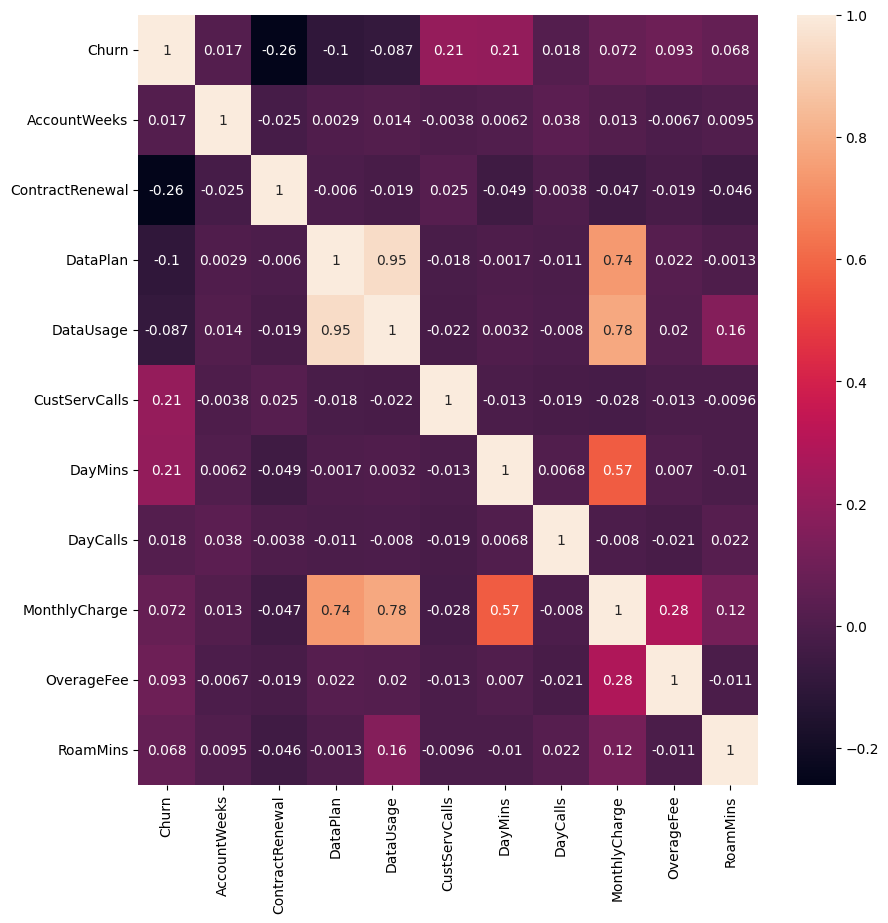

In [13]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

##### We can see that dataplan v/s monthlycharge  ,daymins v/s monthlycharge,monthlycharge v/s daymins ,monthlycharge v/s dataplan and monthlycharge v/s datausage.

# We can see here montly charges has multiple collinearity 

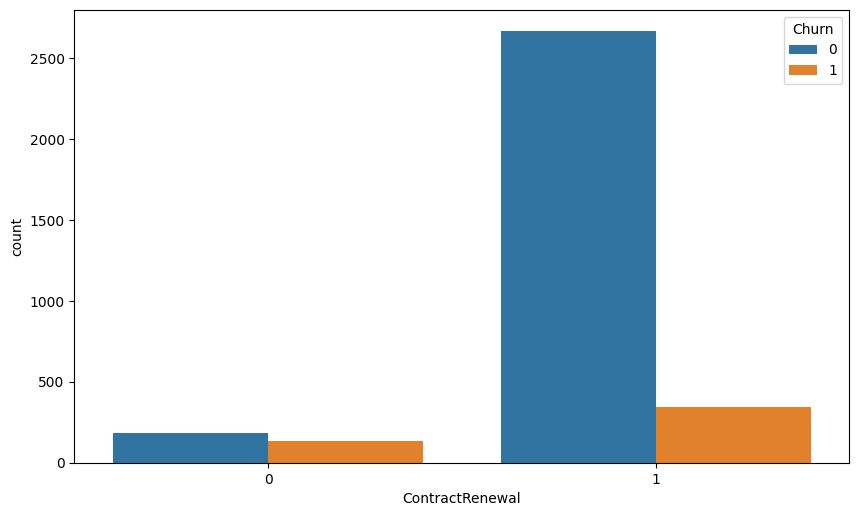

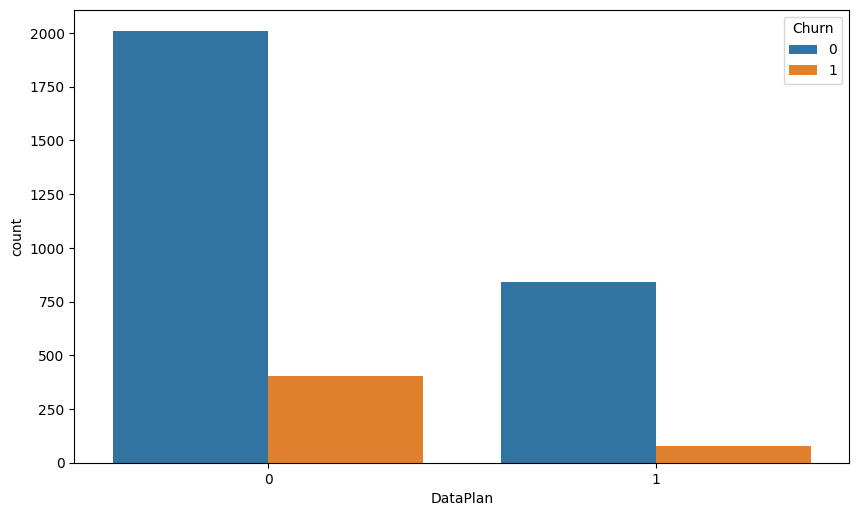

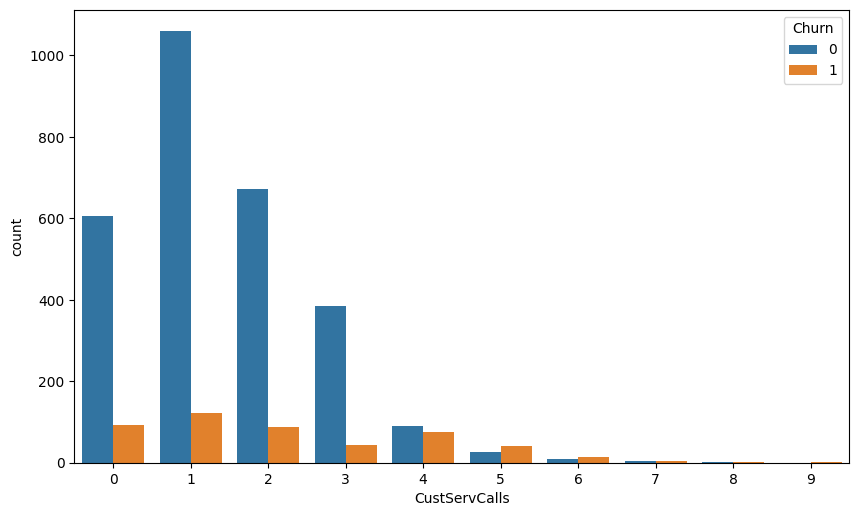

In [14]:
data_col=["ContractRenewal","DataPlan","CustServCalls"]
for i,v in enumerate(data_col):
    fig=plt.figure(figsize=(10,20))
    plt.subplot(len(data_col),1,i+1)
    sns.countplot(x=v,data=data,hue="Churn")

###  Note:
#### 1) From first graph we can conclude 75% of customer that those who are not recently renewed contract they are leaving.
#### 2) From second graph we can conclude 20% of customer that who are not active or not having active data plan they are leaving (i.e hence company need to reduce cost of dataplan or they must provide offer for those who are leaving)
#### 3) From second graph we can conclude 5% of customer that who are active or having active data plan they are leaving (i.e hence company need imporve network steability or network coverage.)
#### 4) From fourth graph we can conclude that who are called maximum times for customer service 100% people are leaving and we can conclude that customer service is poor.

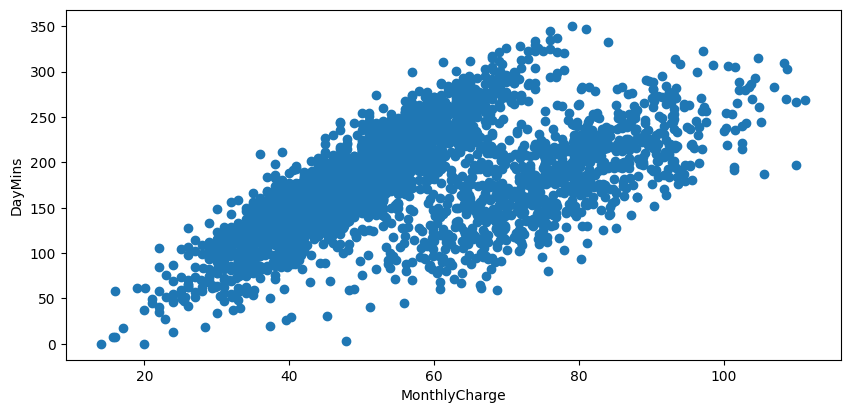

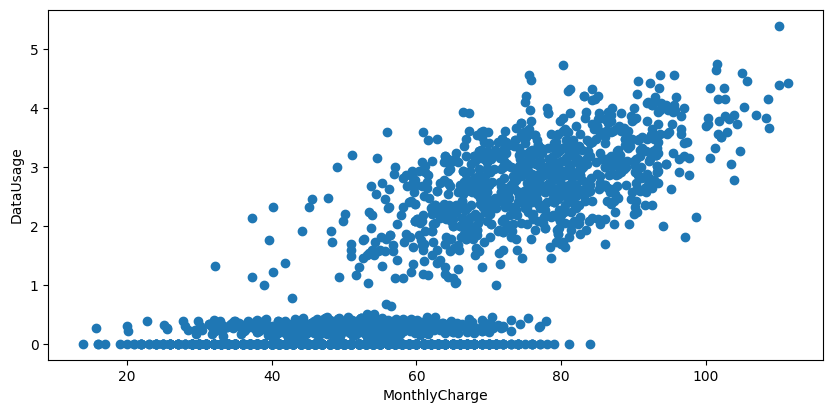

In [15]:
data_col=["DayMins","DataUsage"]
for i,v in enumerate(data_col):
    fig=plt.figure(figsize=(10,10))
    plt.subplot(len(data_col),1,i+1)
    plt.scatter(data.MonthlyCharge,data[v])
    plt.xlabel("MonthlyCharge")
    plt.ylabel(v)

#### Note: From above graph we can conclude that this telecom company make charges based on Datausage and Daysmins also.

# Treating Outliers

In [16]:
## to choose countinous data 
catogorical_col=list()
for i in data.columns:
    if len(data[i].value_counts()) > 2:
        catogorical_col.append(i)

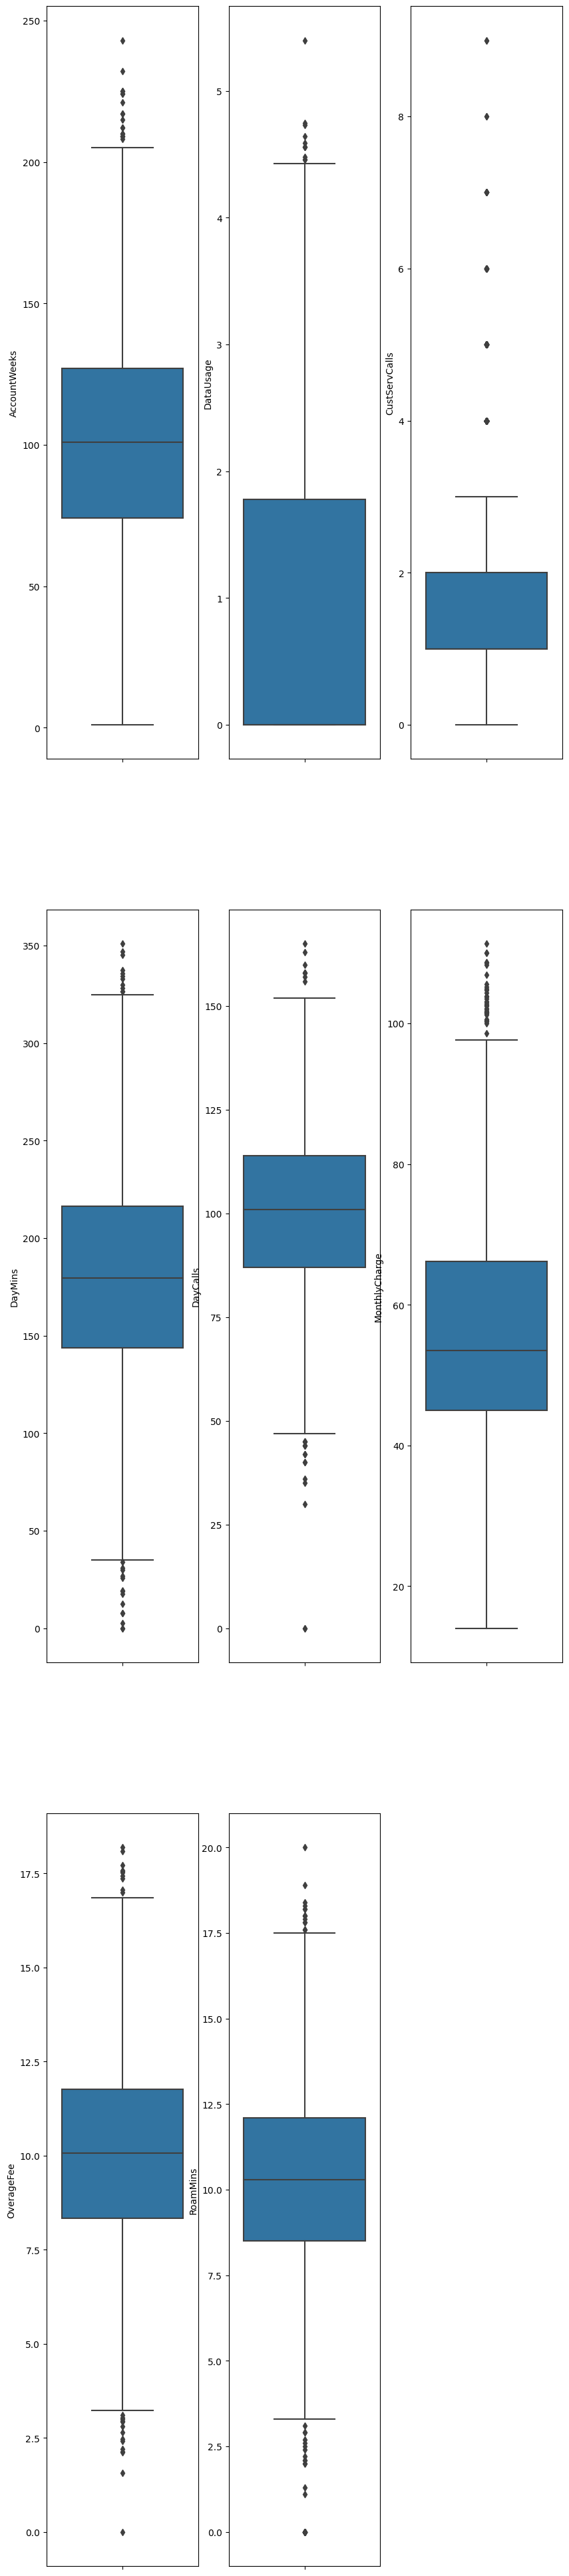

In [17]:
fig=plt.figure(figsize=(10,50))
for i,v in enumerate(catogorical_col):
    plt.subplot(3,3,i+1)
    sns.boxplot(y=v,data=data)

### Outliers wont make much sense in logistic regression

# Model Creation

In [18]:
X=pd.DataFrame(data.iloc[:,1:])
Y=pd.DataFrame(data.iloc[:,0])

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test =train_test_split(X,Y,test_size=0.2,random_state=29)

In [20]:
from sklearn.tree import DecisionTreeClassifier
log= DecisionTreeClassifier()

log.fit(x_train,y_train)

DecisionTreeClassifier()

In [21]:
y_pred = log.predict(x_test)

In [22]:
import math
print('Train Accuracy:', math.floor((log.score(x_train, y_train))*100)) 
print('Test Accuracy:', math.floor((log.score(x_test, y_test))*100))

Train Accuracy: 100
Test Accuracy: 89


In [23]:
#Confusion matrix(train)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, log.predict(x_train))
print(confusion_matrix)

[[2275    0]
 [   0  391]]


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_train, log.predict(x_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2275
           1       1.00      1.00      1.00       391

    accuracy                           1.00      2666
   macro avg       1.00      1.00      1.00      2666
weighted avg       1.00      1.00      1.00      2666



In [25]:
#Confusion matrix (test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[541  34]
 [ 33  59]]


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       575
           1       0.63      0.64      0.64        92

    accuracy                           0.90       667
   macro avg       0.79      0.79      0.79       667
weighted avg       0.90      0.90      0.90       667

